<a href="https://colab.research.google.com/github/eschmidt39/Homework5_Schmidt/blob/main/Homework5_Schmidt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'sin(X)')

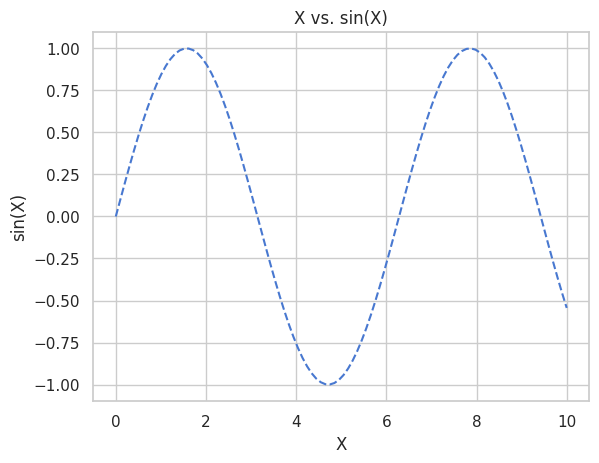

In [36]:
#plot x,y with a dashed and blue line and title and x and y labels
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, "--b")

#add titles and labels
ax.set_title("X vs. sin(X)")
ax.set_xlabel("X")
ax.set_ylabel('sin(X)')

In [37]:
#import tips dataset
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Text(0, 0.5, 'Count')

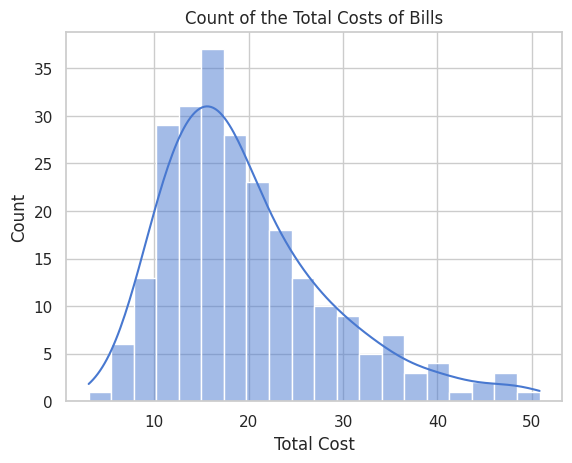

In [38]:
#create a historgram of total_bill with 20 bins and titles
sns.set_theme(style = 'whitegrid', palette='muted')
ax = sns.histplot(data = tips,
             x = 'total_bill',
             bins = 20,
             #overlay a Kernel Density Estimate (KDE)
             kde = True)

#add titles and labels
ax.set_title('Count of the Total Costs of Bills')
ax.set_xlabel("Total Cost")
ax.set_ylabel("Count")

<Axes: title={'center': 'Violin Plot'}, xlabel=' ', ylabel=' '>

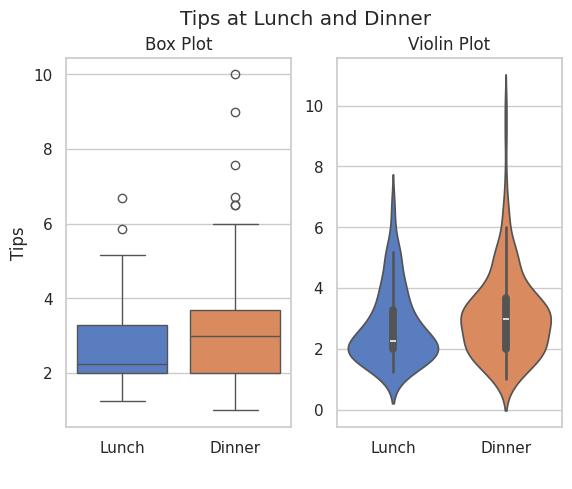

In [39]:
#compare tips and time of day with box plot and violin plots

#create figure and add title/labels, axes[0]=first, axes[1]=second
fig, axes = plt.subplots(1,2)
fig.suptitle('Tips at Lunch and Dinner')
axes[0].set_title('Box Plot')
axes[1].set_title('Violin Plot')
#remove x label "time", doesn't need to be there with lunch and dinner listed
axes[0].set_xlabel(' ')
axes[1].set_xlabel(' ')
axes[0].set_ylabel('Tips')
axes[1].set_ylabel(' ')

#add box and violin plots, ax = axes[] puts it into that specific fig
sns.boxplot(ax = axes[0],
            data = tips,
            x = 'time',
            y = 'tip',
            hue = 'time')
sns.violinplot(ax = axes[1],
               data = tips,
               x = 'time',
               y = 'tip',
               hue = 'time')

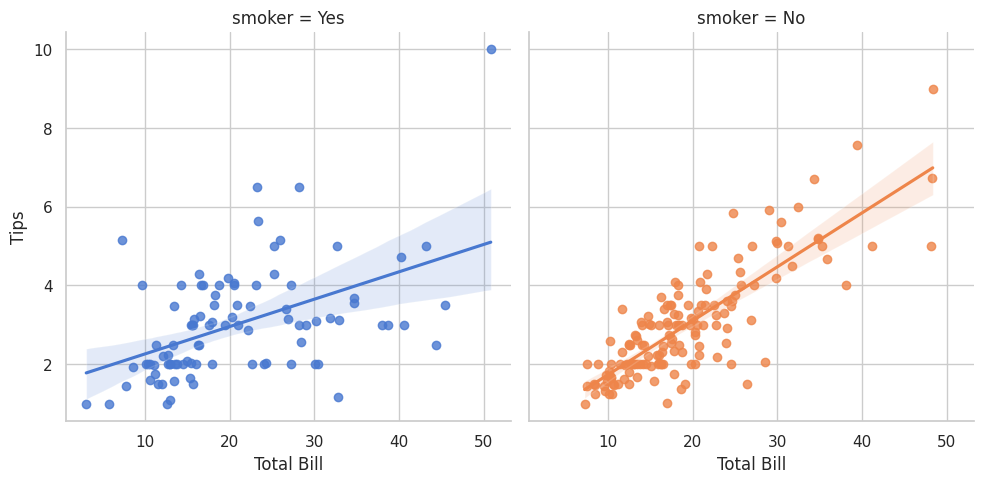

In [40]:
#scatter plot of total_bill vs. tip colored with smoker status and add regression line
sns.set_style("whitegrid")
ax = sns.lmplot(data = tips,
            x = 'total_bill',
            y = 'tip',
            hue = 'smoker',
            order = 1,
              col = "smoker")
ax.set_axis_labels('Total Bill', 'Tips')

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<Axes: >

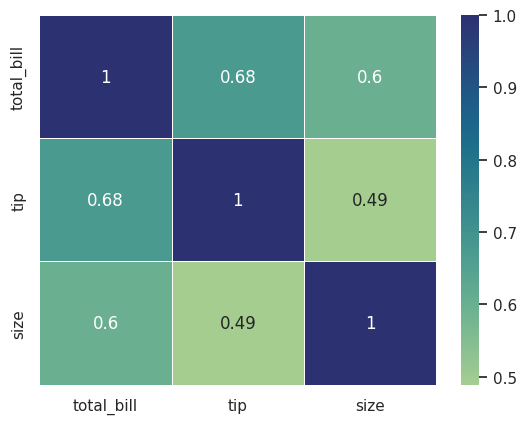

In [41]:
#correlation matrix of tips using a heatmap

#find the correlation, numeric only because can't find correlation between strings
tips_corr = tips.corr(numeric_only=True)
print(tips_corr)

#make a heatmap with correlation coefficient
sns.heatmap(tips_corr, annot=True, cmap='crest', linewidth=0.5)

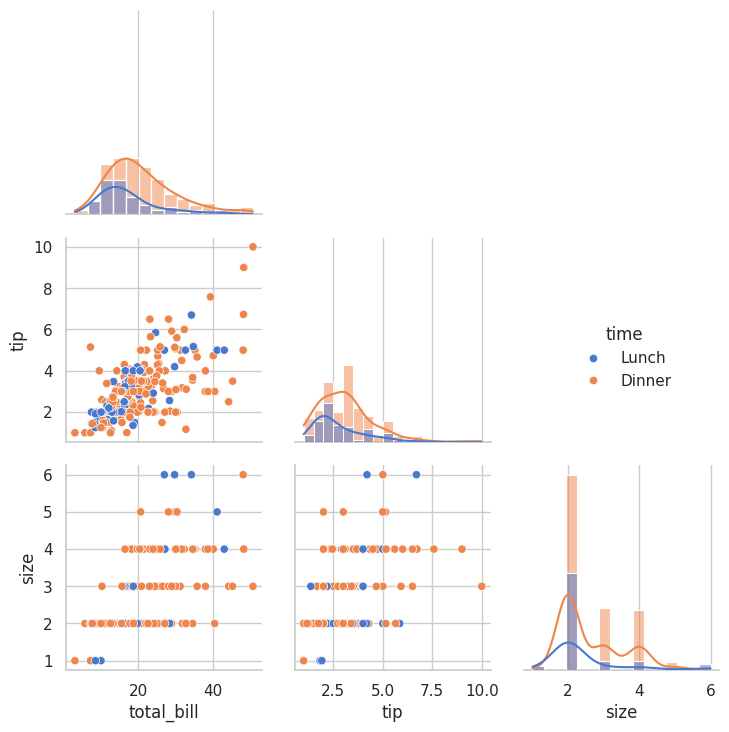

In [42]:

#pair plot for all numerical variables in tips

h = sns.PairGrid(data = tips,
                 hue = 'time',
                 corner = True)
h.map_diag(sns.histplot, kde = True)
h.map_lower(sns.scatterplot)

h.add_legend(frameon=False)
h.legend.set_bbox_to_anchor((0.8, 0.5))